# Sorting algorithms report for AandDS - report no. 1
by Jędrzej Kopiszka, 145304 2. sem of Artificial Intelligence (2020)

In [218]:
import sys
sys.setrecursionlimit(10**7) #expanding recursion depth for bigger datasets

## Algorithms implementation

### 1. Bubble Sort

In [221]:
def bubble_sort(elements):
    n=0
    for i in range(len(elements)-n):
        for j in range(len(elements)-1):
            if elements[j]>elements[j+1]:
                elements[j+1],elements[j] = elements[j], elements[j+1]
                n+=1
    return elements

### 2. Heap sort

In [223]:
def heapify(arr, n, i): 
    largest = i  
    l = 2 * i + 1    
    r = 2 * i + 2     
  
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    if r < n and arr[largest] < arr[r]: 
        largest = r 

    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]
        heapify(arr, n, largest) 

    
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0)
        

In [224]:
a=[1,4,2,3]
heapSort(a)
a

[1, 2, 3, 4]

### 3. Counting Sort

In [225]:
def countSort(arr): 
    output = [0 for i in range(1602)] 
    count = [0 for i in range(1602)] 
    ans = ["" for _ in arr] 
  
    for i in arr: 
        count[int(i)] += 1

    for i in range(1602): 
        count[i] += count[i-1] 
  
    for i in range(len(arr)): 
        output[count[arr[i]]-1] = arr[i] 
        count[arr[i]] -= 1

    for i in range(len(arr)): 
        ans[i] = output[i] 
    return ans 


In [226]:
countSort([52,31,3,12,212,2,2,2,4,0,12,4,654, 343,234, 432,32, 999, 1000])

[0, 2, 2, 2, 3, 4, 4, 12, 12, 31, 32, 52, 212, 234, 343, 432, 654, 999, 1000]

### 4. Shell Sort

In [227]:
def shellSort(arr): 
    n = len(arr) 
    gap = int(n/2)
  
    while gap > 0: 
        for i in range(gap,n): 
            temp = arr[i] 
            j = i 
            while  j >= gap and arr[j-gap] >temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
            arr[j] = temp 
        gap = int(gap/2)
    return arr


In [228]:
shellSort([321,2,1,1600])

[1, 2, 321, 1600]

### 5. Quick Sort

In [229]:
from random import *

def qsort(x, l, r):
    i = l
    j = r
    p = x[int(l + (r - l) / 2)] # pivot element in the middle
    while i <= j:
        while x[i] < p: i += 1
        while x[j] > p: j -= 1
        if i <= j: # swap 
            x[i], x[j] = x[j], x[i]
            i += 1
            j -= 1
    if l < j: # sort left list
        qsort(x, l, j)
    if i < r: # sort right list
        qsort(x, i, r)
    return x


In [230]:
tab = [int(i%2) for i in range(33,0,-2)]
tab = qsort(tab, 0, len(tab)-1)
tab

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### 6. Merge Sort

In [231]:
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2
        L = arr[:mid] 
        R = arr[mid:] 
  
        mergeSort(L) 
        mergeSort(R) 
  
        i = j = k = 0
    
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1

        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
    return arr


In [232]:
mergeSort([432,987, 43,232,56,43,21,1,2,121]) 

[1, 2, 21, 43, 43, 56, 121, 232, 432, 987]

## Exercise I.1
compare speed of BS, HS, CS, ShS using randomly generated integers
submit a chart t=f(n)

In [233]:
import copy # deepcpy for equal data distribution
from numpy import random #generating random numbers according to uniform probability distrib
import numpy as np #numpy for np.nan where computation cannot be done
import pandas as pd # DataFrame for easier data handling
import seaborn as sns  # library for visual aids
import matplotlib.pyplot as plt  # library for visual aids
from timeit import Timer #time measuring

In [234]:
#0.04926030000024184
#0.00026829999978872365
t = Timer(lambda: bubble_sort(elements))
print(t.timeit(number = 1000))

0.04117900000164809


In [235]:
time_dict={}

for i in range(100, 1600+1, 100):
    #creating datasets
    randoms=[]
    for j in range(i):
        randoms.append(int(random.uniform(1000)))
        
    buble_rand = copy.deepcopy(randoms) 
    heap_rand = copy.deepcopy(randoms)
    count_rand = copy.deepcopy(randoms)
    shell_rand = copy.deepcopy(randoms)
    
    #bubble sort time measuring    
    t = Timer(lambda: bubble_sort(buble_rand))
    time_dict[i] = [t.timeit(number = 10)/10]
    
    #heap sort time measuring
    t = Timer(lambda: heapSort(heap_rand))
    time_dict[i].append(t.timeit(number = 10)/10)
    
    #count sort time measuring
    t = Timer(lambda: countSort(count_rand))
    time_dict[i].append(t.timeit(number = 10)/10)
    
    #shell sort 
    t = Timer(lambda: shellSort(shell_rand))
    time_dict[i].append(t.timeit(number = 10)/10)
    
time_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_dict, columns=['Bubble Sort', 'Heap Sort', 'Count Sort', 'Shell Sort'])
time_df

,Bubble Sort,Heap Sort,Count Sort,Shell Sort
100,0.000746,0.000273,0.000320,0.000088
200,0.005154,0.000594,0.000329,0.000160
300,0.011823,0.002138,0.000771,0.000667
400,0.024729,0.003104,0.000452,0.001019
500,0.038945,0.004003,0.000526,0.001081
600,0.057475,0.004603,0.000623,0.001555
700,0.078794,0.005777,0.000965,0.001961
800,0.104401,0.006663,0.001256,0.002219
900,0.133350,0.007960,0.001027,0.002667
1000,0.165458,0.008878,0.001215,0.002620


Text(0, 0.5, 't = f(n)')

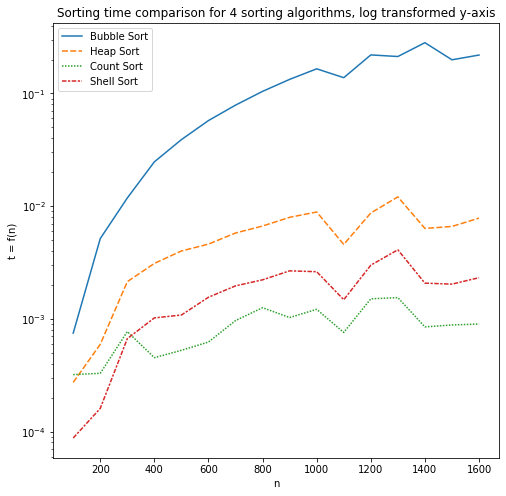

In [236]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_df)
plt.yscale('log')
plt.title('Sorting time comparison for 4 sorting algorithms, log transformed y-axis')
plt.xlabel('n')
plt.ylabel('t = f(n)')

## Exercise I.2
II.1.For different input types compare the effectiveness of 3 sorting algorithms.
a)QS with middle selected pivot, b) HS and c) MS. Examine the performance for the following data types of the sequence:
- random (uniform distribution)
- constant value (e.g.equal to 0)
- increasing order (step equal to 1)
- descending order (step equal to 1)
- ascending-descending order (A shape – increase odd numbers - decrease even)
- descending-ascending order (V -shape – decrease odd numbers - increase even

#### Random distribution of data

In [238]:
time_uniform = {}

for n in range(10000, 25001, 1000):
    uniform_distr=[]
    for j in range(n):
        uniform_distr.append(int(random.uniform(1000)))

    quick_uni = copy.deepcopy(uniform_distr)
    heap_uni = copy.deepcopy(uniform_distr)
    merge_uni = copy.deepcopy(uniform_distr)
    
    #quick sort time measurement for random data according to uniform distribution
    t = Timer(lambda: qsort(quick_uni, 0, len(quick_uni)-1))
    time_uniform[n] = [t.timeit(number = 10)/10]
    
    #heap sort time measurement 
    t = Timer(lambda: heapSort(heap_uni))
    time_uniform[n].append(t.timeit(number = 10)/10)
    
    #merge sort time measurement
    t = Timer(lambda: mergeSort(merge_uni))
    time_uniform[n].append(t.timeit(number = 10)/10)
    

time_uniform_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_uniform, columns=['QuickS unif', 'HeapS unif', 'MergeS unif'])
time_uniform_df

,QuickS unif,HeapS unif,MergeS unif
10000,0.016002,0.116549,0.042706
11000,0.016493,0.065312,0.061056
12000,0.040402,0.073354,0.055042
13000,0.020806,0.079910,0.056632
14000,0.023768,0.096344,0.059629
15000,0.031177,0.093226,0.061722
16000,0.025792,0.096158,0.066937
17000,0.028079,0.104066,0.100419
18000,0.028760,0.125250,0.136944
19000,0.031181,0.115822,0.080682


Text(0.5, 1.0, 'Time comparison on randomly generated data (uniformly distributed)')

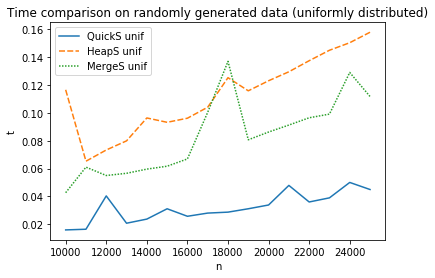

In [239]:
sns.lineplot(data=time_uniform_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title("Time comparison on randomly generated data (uniformly distributed)")

#### Constant value data

In [240]:
time_constant_dic={}

for n in range(10000, 25001, 1000):
    constant_data=[0 for i in range(n)]

    t = Timer(lambda: qsort(constant_data, 0, len(constant_data)-1))
    time_constant_dic[n] = [t.timeit(number = 10)/10]
    
    t = Timer(lambda: heapSort(constant_data))
    time_constant_dic[n].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: mergeSort(constant_data))
    time_constant_dic[n].append(t.timeit(number = 10)/10)
    
time_constant_df = pd.DataFrame.from_dict(data=time_constant_dic, orient='index', \
                                              columns=['QuickS const', 'HeapS const', 'MergeS const'])
    
time_constant_df.head()

,QuickS const,HeapS const,MergeS const
10000,0.020694,0.011077,0.038807
11000,0.021317,0.008148,0.045069
12000,0.027037,0.009038,0.046203
13000,0.025625,0.010448,0.049464
14000,0.027620,0.010725,0.056719


Text(0.5, 1.0, 'Time comparison for data with only constant value')

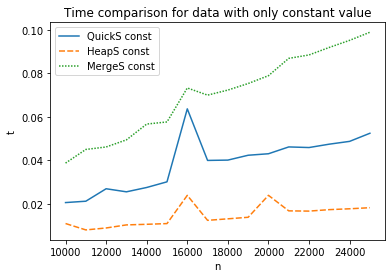

In [241]:
sns.lineplot(data=time_constant_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data with only constant value')

Text(0, 0.5, 't')

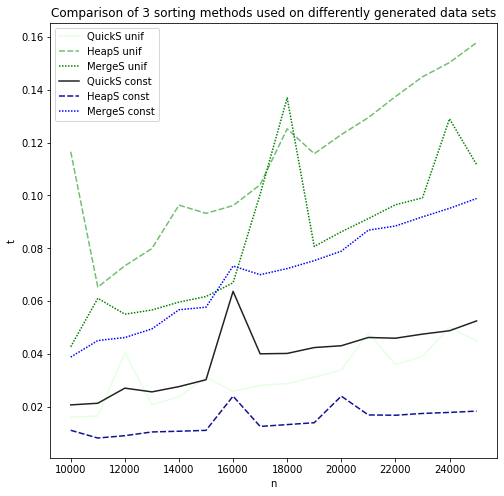

In [242]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_uniform_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_constant_df, style='choice', palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### Increasing order

In [243]:
time_increasing_dict={}

for n in range(10000, 25001, 1000):
    
    increasing_rand = [j for j in range(n)]
    
    t = Timer(lambda: qsort(increasing_rand, 0, len(increasing_rand)-1))
    time_increasing_dict[n] = [t.timeit(number = 10)/10]

    t = Timer(lambda: heapSort(increasing_rand))
    time_increasing_dict[n].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: mergeSort(increasing_rand))
    time_increasing_dict[n].append(t.timeit(number = 10)/10)
    
time_increasing_df = pd.DataFrame.from_dict(data=time_increasing_dict, orient='index', \
                                              columns=['QuickS incr', 'HeapS incr', 'MergeS incr'])
    
time_increasing_df.head()

,QuickS incr,HeapS incr,MergeS incr
10000,0.012927,0.091808,0.035818
11000,0.013603,0.064990,0.040123
12000,0.014913,0.105367,0.085940
13000,0.032641,0.168587,0.080383
14000,0.033978,0.091315,0.051249


Text(0.5, 1.0, 'Time comparison for data generated in increasing order with step 1, log-transformed')

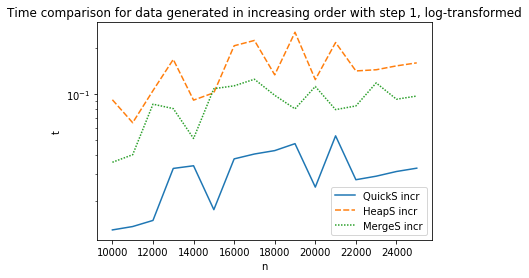

In [249]:
sns.lineplot(data=time_increasing_df)
plt.xlabel('n')
plt.ylabel('t')
plt.yscale('log')
plt.title('Time comparison for data generated in increasing order with step 1, log-transformed')

Python interpreter cannot handle that amount of data due to 'maximum recursion depth exceeded' when using Quick Sort

#### Descending order

In [248]:
time_descending_dict={}

for n in range(10000, 25001, 1000):
    descending_rand=[j for j in range(n,1,-1)]
    
    quick_desc = copy.deepcopy(descending_rand)
    heap_desc = copy.deepcopy(descending_rand)
    merge_desc = copy.deepcopy(descending_rand)
    
    t = Timer(lambda: qsort(quick_desc, 0, len(quick_desc)-1))
    time_descending_dict[n] = [t.timeit(number = 10)/10]
    
    t = Timer(lambda: heapSort(heap_desc))
    time_descending_dict[n].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: mergeSort(merge_desc))
    time_descending_dict[n].append(t.timeit(number = 10)/10)
    

    
time_descending_df = pd.DataFrame.from_dict(data=time_descending_dict, orient='index', \
                                              columns=['QuickS desc', 'HeapS desc', 'MergeS desc'])
    
time_descending_df.head()

,QuickS desc,HeapS desc,MergeS desc
10000,0.012085,0.062206,0.037250
11000,0.013420,0.064842,0.039073
12000,0.014893,0.075458,0.049051
13000,0.015982,0.082610,0.049144
14000,0.016712,0.087841,0.052305


Text(0.5, 1.0, 'Time comparison for data generated in descending order with step -1')

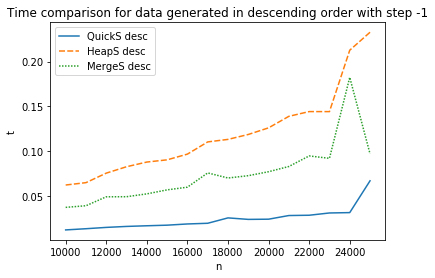

In [250]:
sns.lineplot(data=time_descending_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data generated in descending order with step -1')

Text(0, 0.5, 't')

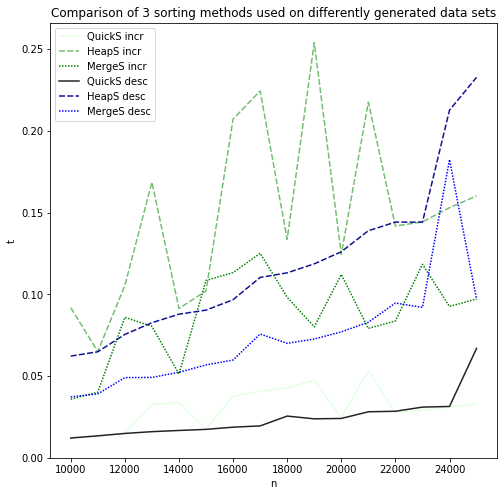

In [251]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_increasing_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_descending_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### A-shaped data 

In [252]:
a_shape_dict={}
for n in range(10000, 25001, 1000):
    a_shape=[]
    for i in range(1,n,2):
        if i<n/2:
            a_shape.append(i)
        else:
            a_shape.append(n-i-1)
    
    quick_a = copy.deepcopy(a_shape)
    heap_a = copy.deepcopy(a_shape)
    merge_a = copy.deepcopy(a_shape)
    
    t = Timer(lambda: qsort(quick_a, 0, len(quick_a)-1))
    a_shape_dict[n] = [t.timeit(number = 10)/10]
    
    t = Timer(lambda: heapSort(heap_a))
    a_shape_dict[n].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: mergeSort(merge_a))
    a_shape_dict[n].append(t.timeit(number = 10)/10)

    
time_a_shape_df = pd.DataFrame.from_dict(data=a_shape_dict, orient='index', \
                        columns=['QuickS. A_shape', 'HeapS. A_shape', 'MergeS. A_shape'])
time_a_shape_df

,QuickS. A_shape,HeapS. A_shape,MergeS. A_shape
10000,0.007770,0.034832,0.032107
11000,0.017082,0.035153,0.021271
12000,0.009615,0.035331,0.020799
13000,0.010560,0.038529,0.022598
14000,0.011238,0.040433,0.024051
15000,0.012449,0.047493,0.025919
16000,0.012823,0.047214,0.029827
17000,0.013666,0.050482,0.031565
18000,0.015509,0.052063,0.033105
19000,0.016391,0.056344,0.057683


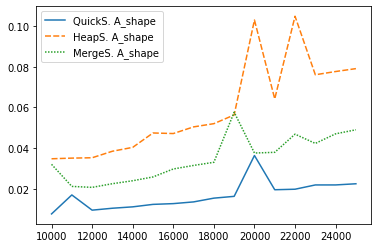

In [253]:
sns.lineplot(data=time_a_shape_df)

#### V-shaped data

In [254]:
v_shape_dict={}
for n in range(10000, 25001, 1000):
    v_shape=[]
    for i in range(1,n,2):
        if i>20/2:
            v_shape.append(i-1)
        else:
            v_shape.append(n-i)
    
    quick_v = copy.deepcopy(v_shape)
    heap_v = copy.deepcopy(v_shape)
    merge_v = copy.deepcopy(v_shape)
    
    t = Timer(lambda: qsort(quick_v, 0, len(quick_v)-1))
    v_shape_dict[n] = [t.timeit(number = 10)/10]
    
    t = Timer(lambda: heapSort(heap_v))
    v_shape_dict[n].append(t.timeit(number = 10)/10)
    
    t = Timer(lambda: mergeSort(merge_v))
    v_shape_dict[n].append(t.timeit(number = 10)/10)
    
    
time_v_shape_df = pd.DataFrame.from_dict(data=v_shape_dict, orient='index', \
                        columns=['QuickS. V_shape', 'HeapS. V_shape', 'MergeS. V_shape'])
time_v_shape_df

,QuickS. V_shape,HeapS. V_shape,MergeS. V_shape
10000,0.011158,0.035364,0.016596
11000,0.006399,0.030686,0.018700
12000,0.007629,0.033544,0.020229
13000,0.007590,0.038754,0.035010
14000,0.017102,0.084548,0.047364
15000,0.017400,0.094698,0.051676
16000,0.018647,0.097476,0.054980
17000,0.019989,0.106103,0.059986
18000,0.021282,0.110800,0.033662
19000,0.012077,0.068767,0.059832


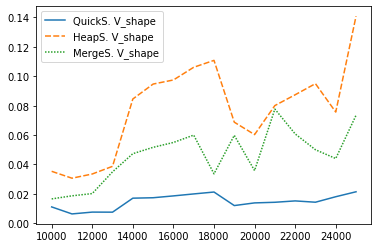

In [255]:
sns.lineplot(data=time_v_shape_df)

Text(0, 0.5, 't')

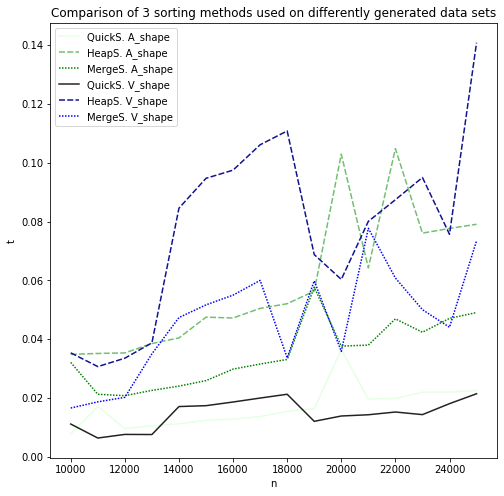

In [256]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_a_shape_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_v_shape_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

Text(0.5, 1.0, 'All methods on all datasets')

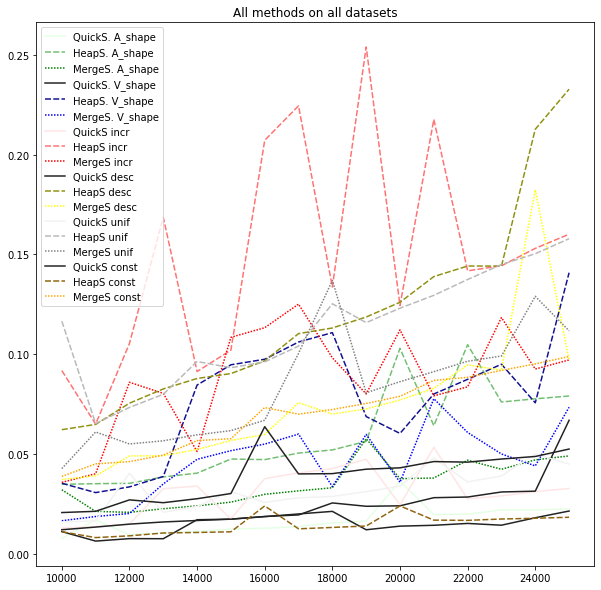

In [261]:

plt.figure(figsize=(10,10))
sns.lineplot(data=time_a_shape_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_v_shape_df, palette=sns.dark_palette('blue', n_colors=3))
sns.lineplot(data=time_increasing_df, palette=sns.light_palette('red', n_colors=3))
sns.lineplot(data=time_descending_df, palette=sns.dark_palette('yellow', n_colors=3))
sns.lineplot(data=time_uniform_df, palette=sns.light_palette('grey', n_colors=3))
sns.lineplot(data=time_constant_df, style='choice', palette=sns.dark_palette('orange', n_colors=3))
plt.title("All methods on all datasets")

### Quick Sort for differently generated data sets

#### Uniformly generated

In [272]:
quick_dict={}
for n in range(10000, 25001, 1000):
    quick_uni=[]
    for j in range(n):
        quick_uni.append(int(random.uniform(1000)))
        
    t = Timer(lambda: qsort(quick_uni, 0, len(quick_uni)-1))
    quick_dict[n] = [t.timeit(number = 10)/10]


#### Constant

In [273]:
for n in range(10000, 25001, 1000):
    quick_const=[0 for j in range(n)]
    
    t = Timer(lambda: qsort(quick_const, 0, len(quick_const)-1))
    quick_dict[n].append(t.timeit(number = 10)/10)


#### Increasing order

In [274]:
for n in range(10000, 25001, 1000):
    quick_incr=[j for j in range(n)]

    t = Timer(lambda: qsort(quick_incr, 0, len(quick_incr)-1))
    quick_dict[n].append(t.timeit(number = 10)/10)


#### Decreasing order

In [275]:
for n in range(10000, 25001, 1000):
    quick_decr=[j for j in range(n, 0,-1)]

    t = Timer(lambda: qsort(quick_decr, 0, len(quick_decr)-1))
    quick_dict[n].append(t.timeit(number = 10)/10)



#### A-shaped

In [276]:
for n in range(10000,25001, 1000):
    quick_a_sh=[]
    for i in range(1,n,2):
        if i<n/2:
            quick_a_sh.append(i)
        else:
            quick_a_sh.append(n-i-1)

    t = Timer(lambda: qsort(quick_a_sh, 0, len(quick_a_sh)-1))
    quick_dict[n].append(t.timeit(number = 10)/10)



#### V-shaped

In [277]:
for n in range(10000, 25001, 1000):
    quick_v_sh=[]
    for i in range(1,100,2):
        if i>n/2:
            quick_v_sh.append(i-1)
        else:
            quick_v_sh.append(n-i)

    t = Timer(lambda: qsort(quick_v_sh, 0, len(quick_v_sh)-1))
    quick_dict[n].append(t.timeit(number = 10)/10)


In [278]:
time_quick_df = pd.DataFrame.from_dict(data=quick_dict, orient='index', \
                        columns=['Uniform', 'Constant', 'Increasing', 'Decreasing', 'A shape', 'V shape'])
time_quick_df

,Uniform,Constant,Increasing,Decreasing,A shape,V shape
10000,0.026749,0.020923,0.013166,0.012961,0.008180,0.000028
11000,0.016467,0.023619,0.014789,0.014539,0.008618,0.000032
12000,0.018001,0.022938,0.014942,0.014767,0.011104,0.000027
13000,0.019738,0.024980,0.015628,0.015824,0.010010,0.000027
14000,0.021352,0.027359,0.016807,0.016890,0.010748,0.000083
15000,0.024707,0.029465,0.017734,0.017689,0.011559,0.000039
16000,0.025728,0.030070,0.022483,0.018651,0.012592,0.000030
17000,0.026872,0.037304,0.030665,0.019870,0.013132,0.000042
18000,0.030923,0.040470,0.021542,0.023302,0.016223,0.000027
19000,0.031202,0.040349,0.023160,0.023486,0.016211,0.000027


Text(0, 0.5, 't')

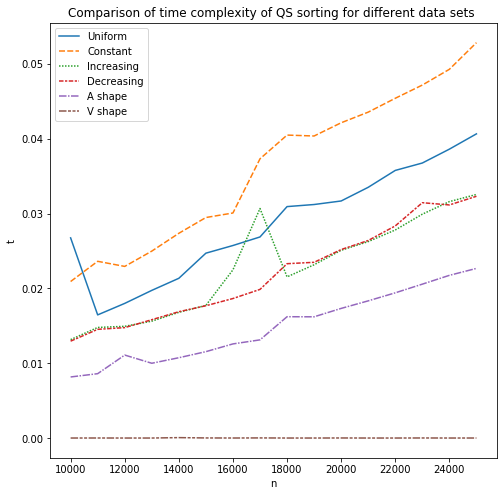

In [279]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_quick_df)
plt.title('Comparison of time complexity of QS sorting for different data sets ')
plt.xlabel('n')
plt.ylabel('t')